## TAREA 2 
## BENJAMIN CORREA

In [250]:
import pandas as pd

#carga de archivos

dv = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis.csv")
de = pd.read_csv("https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/pobXedadCenso.csv")
dr = pd.read_csv("https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv")

In [252]:
#Sumar la cantidad de vacunados en todas las fechas por comuna


dv1=dv[dv["Region"].str.contains("Metropolitana")]
col_list=list(dv1)
col_list.remove('Codigo region')
col_list.remove('Codigo comuna')
col_list.remove('Poblacion')
col_list.remove('Region')
col_list.remove('Comuna')
#col_list





dv1["Total"] = dv1[col_list].sum(axis=1)
dv1
#d=dv1[col_list]

#d = d.sum(axis=1)
#d
#dv1['f']=dv1.iloc[:,0:].sum(axis=1)
#dv1("Total") = d



dv1=dv1[['Region','Comuna','Codigo comuna','Poblacion','Total']]

dv1=dv1.drop([140],axis=0)

dv1.head()


C:\Users\Benjamin Correa\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Region,Comuna,Codigo comuna,Poblacion,Total
88,Metropolitana,Alhue,13502.0,7405.0,5518.0
89,Metropolitana,Buin,13402.0,109641.0,62518.0
90,Metropolitana,Calera de Tango,13403.0,28525.0,19186.0
91,Metropolitana,Cerrillos,13102.0,88956.0,43415.0
92,Metropolitana,Cerro Navia,13103.0,142465.0,61194.0


In [253]:
#filtrar comuna y hdi en los datos de riqueza por comuna
dr1=dr[['comuna','HDI']]

dr1.head()


,comuna,HDI
0,13101,0.861222
1,13102,0.764616
2,13103,0.718874
3,13104,0.749584
4,13105,0.742015


In [248]:
#sumar los distintos grupos de edad agrupando por codigo comuna y 
#combinar los distintos datos de los archivos por codigo de comuna 

de = pd.read_csv("https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/pobXedadCenso.csv")
de['EDAD_0A5'] = de['EDAD_0A5'].replace('*', 0)
de['EDAD_6A14'] = de['EDAD_6A14'].replace('*', 0)
de['EDAD_15A64'] = de['EDAD_15A64'].replace('*', 0)
de['EDAD_65YMAS'] = de['EDAD_65YMAS'].replace('*', 0)


de['EDAD_0A5'] = pd.to_numeric(de['EDAD_0A5'])
de['EDAD_6A14'] = pd.to_numeric(de['EDAD_6A14'])
de['EDAD_15A64'] = pd.to_numeric(de['EDAD_15A64'])
de['EDAD_65YMAS'] = pd.to_numeric(de['EDAD_65YMAS'])
de.rename(columns={'COMUNA': 'Codigo comuna'}, inplace = True)
de = de.groupby('Codigo comuna').sum()

daa = pd.merge(dv1,de,how='inner', on='Codigo comuna')

dr1.rename(columns={'comuna': 'Codigo comuna'}, inplace = True)

daa1 = pd.merge(daa,dr1,how='inner', on='Codigo comuna')



daa1["PorcMayorEdad"]=daa1["EDAD_65YMAS"]/daa1["Poblacion"]

daa1.head()



,Region,Comuna,Codigo comuna,Poblacion,Total,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,HDI,PorcMayorEdad
0,Metropolitana,Alhue,13502.0,7405.0,5518.0,309,489,4472,600,0.742609,0.081026
1,Metropolitana,Buin,13402.0,109641.0,62518.0,7296,11651,66360,7667,0.766439,0.069928
2,Metropolitana,Calera de Tango,13403.0,28525.0,19186.0,1700,2991,17442,2072,0.715509,0.072638
3,Metropolitana,Cerrillos,13102.0,88956.0,43415.0,5907,8703,53650,9273,0.764616,0.104243
4,Metropolitana,Cerro Navia,13103.0,142465.0,61194.0,9719,14745,89915,16011,0.718874,0.112385


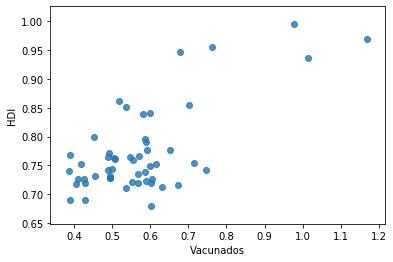

In [240]:
#Graficar la relacion entre el % de vacunados y el nivel de riqueza (HDI)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=daa1.Total/daa1.Poblacion, y=daa1.HDI, alpha= 0.8)
ax.set_xlabel('Vacunados')
ax.set_ylabel('HDI');





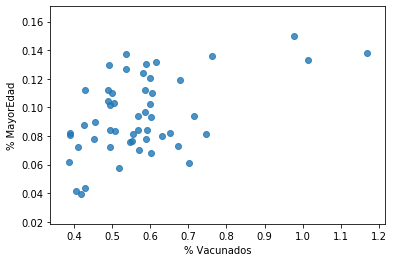

In [242]:
#Graficar la relacion entre el % de vacunados y el % de mayor edad
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=daa1.Total/daa1.Poblacion, y=daa1.PorcMayorEdad, alpha= 0.8)
ax.set_xlabel('% Vacunados')
ax.set_ylabel('% MayorEdad');